In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [3]:
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing(as_frame=True) #as_frame=True позволяет вывести в виде таблицы

Выведем описание датасета:

In [4]:
print(housing.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block
        - HouseAge      median house age in block
        - AveRooms      average number of rooms
        - AveBedrms     average number of bedrooms
        - Population    block population
        - AveOccup      average house occupancy
        - Latitude      house block latitude
        - Longitude     house block longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
http://lib.stat.cmu.edu/datasets/

The target variable is the median house value for California districts.

This dataset was derived from the 1990 U.S. census, using one row per census
block group. A block group is the smallest geographical unit for which the U.S.
Census Bur

Данные в виде таблицы:

In [5]:
housing.frame

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


Выведем все сразу через plt

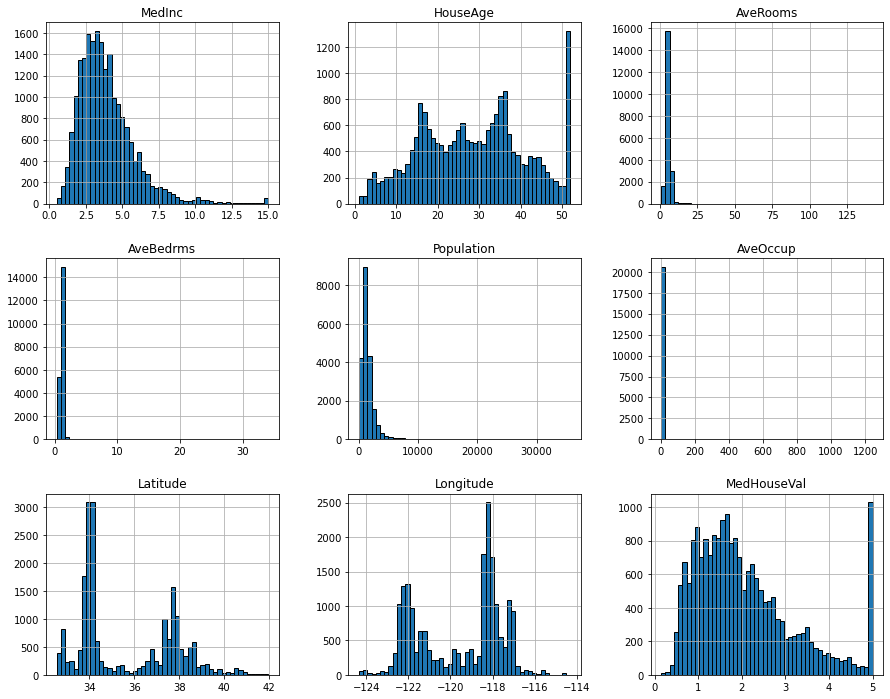

In [6]:
housing.frame.hist(figsize=(15, 12), bins=50, edgecolor="black")
plt.subplots_adjust() #Подогнать графике по ширине полей, по умолячанию поля 0

In [7]:
import seaborn as sns
sns.set()

Далее я немного перепутал названия столбцов, и построил графики распределения долготы, широты и зависимости широты от долготы)

<AxesSubplot:xlabel='Longitude', ylabel='Density'>

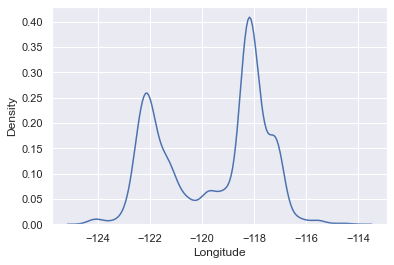

In [77]:
sns.kdeplot(data=housing.frame, x="Longitude")

<AxesSubplot:xlabel='Latitude', ylabel='Density'>

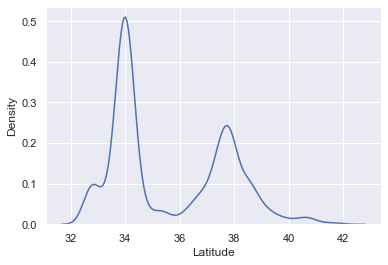

In [82]:
sns.kdeplot(data=housing.frame, x="Latitude")

<AxesSubplot:xlabel='Longitude', ylabel='Latitude'>

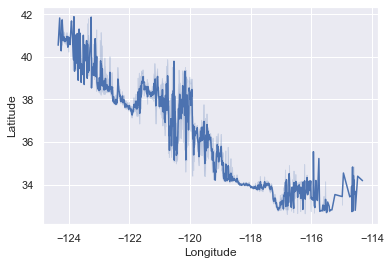

In [81]:
sns.lineplot(data=housing.frame, x="Longitude", y="Latitude")

Выведем распределение среднего дохода по блоку (группе людей в исследовании)

<AxesSubplot:xlabel='MedInc', ylabel='Density'>

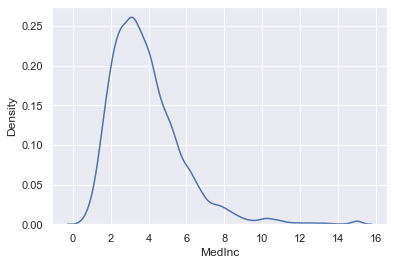

In [8]:
sns.kdeplot(data=housing.frame, x="MedInc")

Распределение близко к нормальному

Рассмотрим количество комнат в строениях по блоку - параметр AveRooms

<AxesSubplot:xlabel='AveRooms', ylabel='Density'>

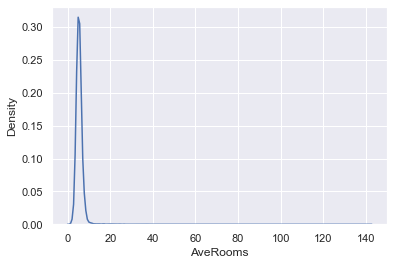

In [28]:
sns.kdeplot(data=housing.frame, x="AveRooms")

Распределение кол-ва комнат также близко к нормальному примерно до 20, но далее идет куда-то очень далеко, кажется, что обычное количество комнат в этих домах обычно в пределах 20 и мы имеем некую аномалию.
Посмотрим, как это выглядит в числах:

In [33]:
housing.frame["AveRooms"].describe()

count    20640.000000
mean         5.429000
std          2.474173
min          0.846154
25%          4.440716
50%          5.229129
75%          6.052381
max        141.909091
Name: AveRooms, dtype: float64

Видим, что в среднем количество комнат в домах по блокам около 5, в 75% входит 6 комнат, но есть некий максимум со 141,9 комнатами, что резко выделяется на фоне остальных. Всего из 20640 объектов всего 145 объектов имеют в среднем больше 12 комнат по блоку (0,7% от всего количества объектов недвижимости в датасете), при этом только половина из них (69 из 20640) имеют больше 20 комнат. Если смотреть по координатам таких объектов, им часто соответствуют различные места с большим количеством комнат для аренды, таких как курорты, это связано с методикой исследования и составления датасета по блокам и домохозяйствам.

In [93]:
housing.data.loc[housing.data["AveRooms"] > 20] #здесь можно менять параметр 20 на другие значения комнат

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
1024,3.1500,16.0,29.852941,5.323529,202.0,1.980392,38.52,-120.00
1102,2.4028,17.0,31.777778,9.703704,47.0,1.740741,40.06,-121.54
1234,4.4063,13.0,28.757282,5.300971,252.0,2.446602,38.26,-120.33
1238,3.3542,10.0,28.112903,5.604839,298.0,2.403226,38.29,-120.27
1239,3.0750,13.0,33.989691,6.824742,267.0,2.752577,38.31,-120.27
...,...,...,...,...,...,...,...,...
19736,6.1359,14.0,22.823529,6.352941,35.0,2.058824,40.12,-121.78
19975,2.1029,11.0,23.994152,5.157895,356.0,2.081871,36.12,-118.54
19976,3.1250,10.0,21.095238,5.285714,48.0,2.285714,36.19,-118.37
20093,2.0625,37.0,24.669118,4.897059,338.0,2.485294,38.12,-120.12


Можем привести график распределения количества комнат к более нормальному, "отбросив" правый конец с экстремальными значениями

<AxesSubplot:xlabel='AveRooms', ylabel='Density'>

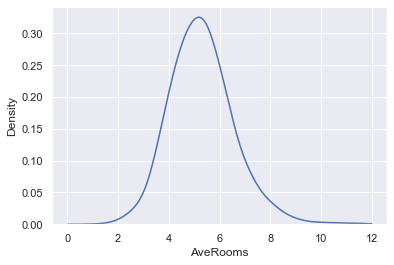

In [87]:
sns.kdeplot(data=housing.frame, x="AveRooms", clip=(0,12))